In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

2023-10-21 09:57:22.339962: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train = pd.read_csv("traindata_rfe.csv")
test = pd.read_csv("testdata_rfe.csv")

/var/folders/ls/8gbvtyrd07g59v3ct9lcsmm00000gn/T/ipykernel_7521/2738918831.py:1: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("traindata_rfe.csv")


In [3]:
train.head()

,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right,label,transcript_id,gene_id
0,244,125.913514,4.386989,6.650,126.0,3.440,1.843025,4.944365,3.302671,2.765244,2.906225,2.522168,1,4,16,0,ENST00000000233,ENSG00000004059
1,261,107.889535,3.016599,3.000,108.0,2.660,1.689167,2.981182,1.237045,3.526528,1.466295,2.492530,6,2,10,0,ENST00000000233,ENSG00000004059
2,316,98.947027,2.087146,3.780,99.5,1.910,1.311103,1.492577,0.893481,3.203816,0.800496,1.484341,12,0,2,0,ENST00000000233,ENSG00000004059
3,332,97.836500,2.236520,2.635,97.5,2.135,2.459317,3.202963,1.393868,1.928009,0.741771,3.494937,2,6,3,0,ENST00000000233,ENSG00000004059
4,368,121.954545,4.260253,5.660,122.0,4.160,2.743228,2.664643,1.753894,2.177236,1.341822,2.379045,3,9,12,0,ENST00000000233,ENSG00000004059


In [4]:
test.head()

,transcript_id,transcript_position,gene_id,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,label,seq_left,seq_center,seq_right
0,ENST00000005257,470,ENSG00000006451,121.032258,2.513839,9.26,121.0,2.390,3.070013,4.203054,1.736880,3.126204,0.869722,1.267762,0,11,17,21
1,ENST00000005257,504,ENSG00000006451,126.029412,2.674206,4.92,126.0,2.315,1.562898,2.673237,1.436917,2.345023,1.113461,1.576460,0,3,11,20
2,ENST00000005257,525,ENSG00000006451,125.387097,3.073226,6.15,126.0,2.880,1.130465,3.727447,2.105785,2.611110,1.273123,2.040985,0,7,3,14
3,ENST00000005257,600,ENSG00000006451,122.606061,3.255455,5.94,122.0,3.030,2.399447,2.938300,2.782057,3.311499,1.286042,1.975153,0,3,11,20
4,ENST00000005257,696,ENSG00000006451,121.965517,3.116897,7.81,122.0,2.820,1.898227,3.906871,2.458343,3.537803,1.348092,1.171399,0,11,17,23


In [5]:
X_train = train.drop(['transcript_id', 'gene_id', 'label'], axis=1)
y_train = train['label']
X_test = test.drop(['transcript_id', 'gene_id', 'label'], axis=1)
y_test = test['label']

In [6]:
y_train.value_counts()

label
0    93715
1    93715
Name: count, dtype: int64

In [7]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(X_train)
normalised_X_train = pd.DataFrame(d, columns=X_train.columns)
X_train = normalised_X_train

In [11]:
X_train.shape

(187430, 15)

In [17]:
normalised_X_train.head()

,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
0,0.012869,0.774042,0.287885,0.463500,0.781312,0.201650,0.048485,0.280016,0.101848,0.226398,0.090561,0.146461,0.043478,0.235294,0.695652
1,0.013777,0.410623,0.157972,0.142480,0.423459,0.130156,0.043891,0.152029,0.033255,0.310842,0.042812,0.144293,0.260870,0.117647,0.434783
2,0.016714,0.230314,0.069860,0.211082,0.254473,0.061412,0.032605,0.054982,0.021846,0.275046,0.020733,0.070529,0.521739,0.000000,0.086957
3,0.017568,0.207922,0.084021,0.110378,0.214712,0.082035,0.066883,0.166488,0.038463,0.133529,0.018786,0.217634,0.086957,0.352941,0.130435
4,0.019491,0.694217,0.275871,0.376429,0.701789,0.267644,0.075359,0.131393,0.050418,0.161175,0.038684,0.135990,0.130435,0.529412,0.521739


In [18]:
normalised_X_test.head()

,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
0,0.054772,0.689752,0.111903,0.727019,0.693878,0.107848,0.189319,0.254995,0.077564,0.365202,0.032594,0.026947,0.478261,1.000000,0.913043
1,0.058768,0.791245,0.128262,0.324048,0.795918,0.100253,0.087639,0.142416,0.062153,0.252199,0.044891,0.043219,0.130435,0.647059,0.869565
2,0.061236,0.778200,0.168967,0.438254,0.795918,0.157468,0.058464,0.219995,0.096518,0.290691,0.052945,0.067706,0.304348,0.176471,0.608696
3,0.070052,0.721716,0.187557,0.418756,0.714286,0.172658,0.144078,0.161922,0.131265,0.392006,0.053597,0.064235,0.130435,0.647059,0.869565
4,0.081335,0.708707,0.173422,0.592386,0.714286,0.151392,0.110263,0.233199,0.114632,0.424743,0.056727,0.021868,0.478261,1.000000,1.000000


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
input_sequence_length = X_train.shape[1]  
input_feature_dimension = 1 
output_dimension = 1

model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(input_sequence_length, input_feature_dimension), activation='relu'))
model.add(Dense(units=output_dimension, activation='softmax'))

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=64, input_shape=(input_sequence_length, input_feature_dimension), activation='relu'))
model.add(Dense(units=output_dimension, activation='sigmoid'))

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
5858/5858 [==============================] - 27s 4ms/step - loss: 0.1025 - accuracy: 0.8597
Epoch 2/10
5858/5858 [==============================] - 26s 4ms/step - loss: 0.0987 - accuracy: 0.8653
Epoch 3/10
5858/5858 [==============================] - 27s 5ms/step - loss: 0.0959 - accuracy: 0.8693
Epoch 4/10
5858/5858 [==============================] - 27s 5ms/step - loss: 0.0928 - accuracy: 0.8749
Epoch 5/10
5858/5858 [==============================] - 27s 5ms/step - loss: 0.0901 - accuracy: 0.8786
Epoch 6/10
5858/5858 [==============================] - 30s 5ms/step - loss: 0.0882 - accuracy: 0.8806
Epoch 7/10
5858/5858 [==============================] - 29s 5ms/step - loss: 0.0859 - accuracy: 0.8836
Epoch 8/10
5858/5858 [==============================] - 28s 5ms/step - loss: 0.0839 - accuracy: 0.8868
Epoch 9/10
5858/5858 [==============================] - 28s 5ms/step - loss: 0.0822 - accuracy: 0.8896
Epoch 10/10
5858/5858 [==============================] - 29s 5ms/step - l

In [25]:
d = scaler.fit_transform(X_test)
normalised_X_test = pd.DataFrame(d, columns=X_test.columns)
#normalised_X_test.head()
X_test = normalised_X_test

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

745/745 [==============================] - 2s 2ms/step - loss: 0.0564 - accuracy: 0.9272
Test Accuracy: 92.72%


In [27]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) 

print(classification_report(y_test, y_pred_classes))

745/745 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     22648
           1       0.35      0.52      0.42      1184

    accuracy                           0.93     23832
   macro avg       0.66      0.73      0.69     23832
weighted avg       0.94      0.93      0.93     23832



745/745 [==============================] - 2s 2ms/step


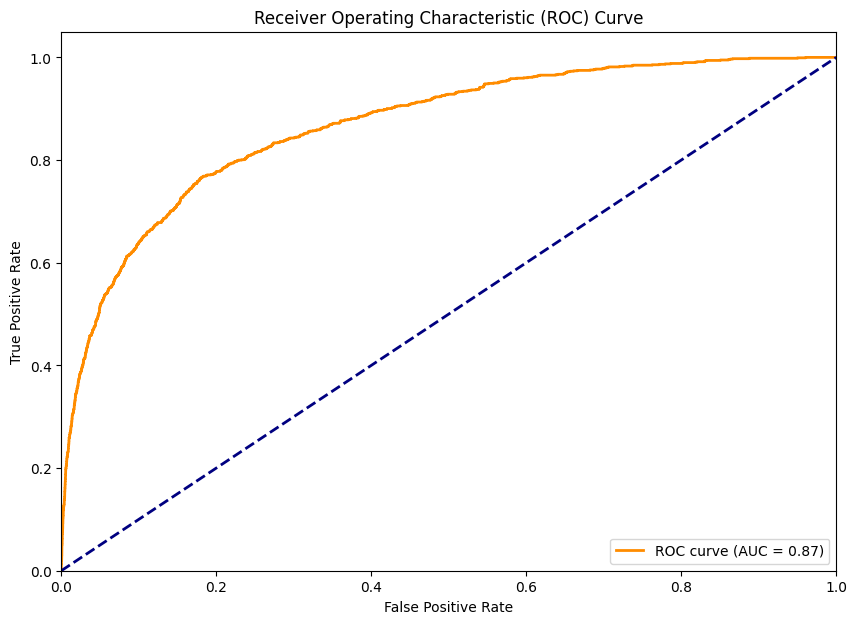

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_probs = model.predict(X_test).ravel()  

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()